In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

1nd

다른 버전, 위에 구한 linear을 구하라는 문제는 아닌 것 같다.
구하라고 하는 것은, 분명 솔루션을 추정하는데에 그 차이가 존재한다는 것을 보여주려는 것 같은데, 그러면 솔루션을 추정하는 함수를 작성해야 한다.

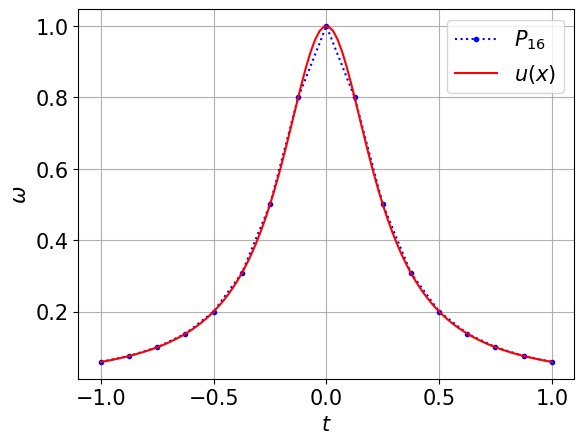

In [214]:
N = 16
xi = [-1 + (x/8) for x in range(0, N+1)]
yi = [1 / (1 + (16 * x**2)) for x in xi]

x_exact = np.linspace(-1, 1, 100)
y_exact = [1 / (1 + 16 * x ** 2) for x in x_exact]

plt.plot(xi, yi, ".:b", label='$P_{16}$')
plt.plot(x_exact, y_exact, "-r", label="$u(x)$")

plt.grid()
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$\omega$")
plt.savefig('P_N(x)_and_u(x).pdf')


2nd

Text(0, 0.5, '$\\omega$')

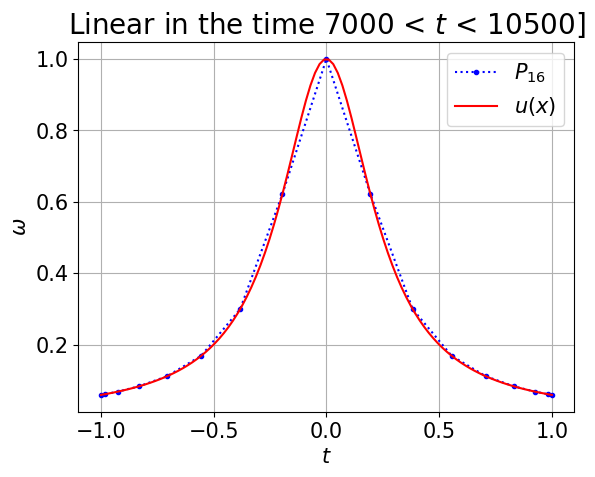

In [213]:
xj = [np.cos((x * np.pi) / 16) for x in range(0, 17)]
yi = [1 / (1 + (16 * x**2)) for x in xj]

x_exact = np.linspace(-1, 1, 100)
y_exact = [1 / (1 + 16 * x ** 2) for x in x_exact]

plt.plot(xi, yi, ".:b", label='$P_{16}$')
plt.plot(x_exact, y_exact, "-r", label="$u(x)$")

plt.title('Linear in the time 7000 < $t$ < 10500]',fontsize = 20)
#plt.xlim([-1.1, 1.1])
#plt.ylim([0.30, 0.7])
plt.grid()
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$\omega$")



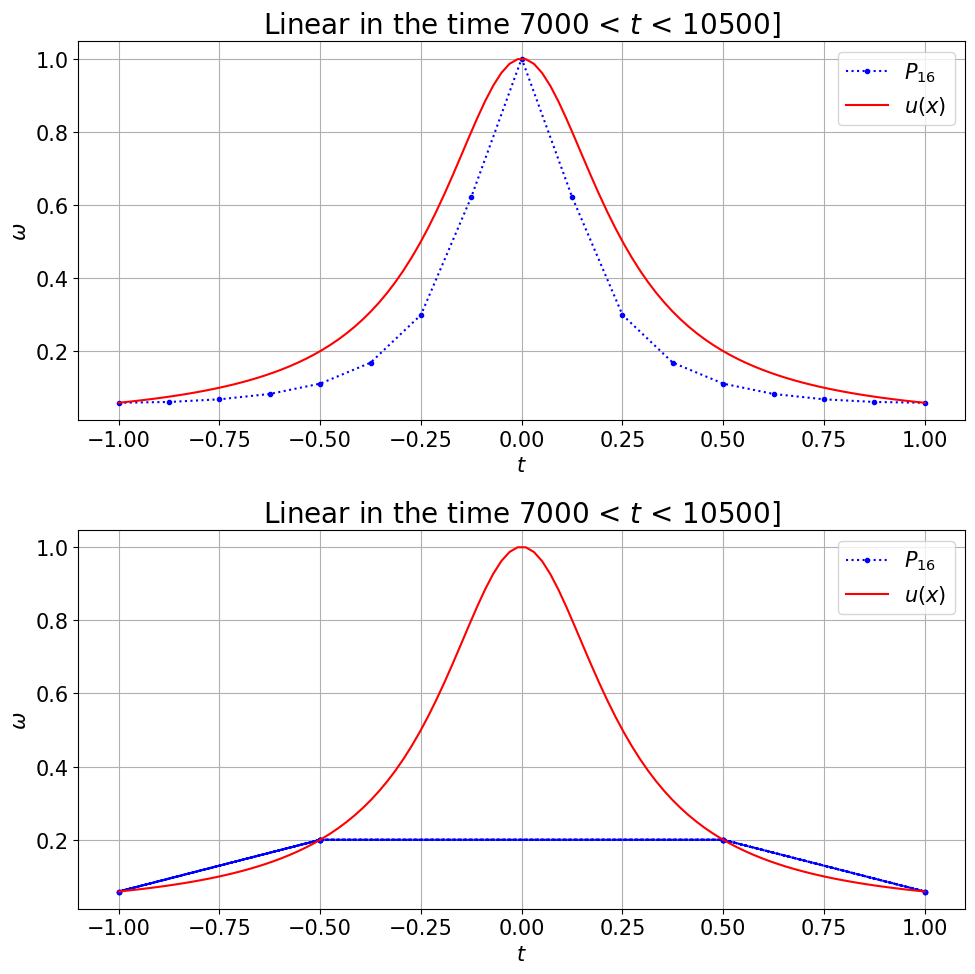

In [199]:
#N
N = 3

plt.figure(figsize = (10,10))
#1
xi = [-1 + (x/8) for x in range(0, 17)]
yi = [1 / (1 + (16 * x**2)) for x in xj]

x_exact = np.linspace(-1, 1, 100)
y_exact = [1 / (1 + 16 * x ** 2) for x in x_exact]

plt.subplot(2, 1, 1)
plt.plot(xi, yi, ".:b", label='$P_{16}$')
plt.plot(x_exact, y_exact, "-r", label="$u(x)$")

plt.title('Linear in the time 7000 < $t$ < 10500]',fontsize = 20)
#plt.xlim([-1.1, 1.1])
#plt.ylim([0.30, 0.7])
plt.grid()
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$\omega$")



#2
xj = [np.cos((x * np.pi) / N) for x in range(0, 17)]
yj = [1 / (1 + (16 * x**2)) for x in xj]

plt.subplot(2, 1, 2)
plt.plot(xj, yj, ".:b", label='$P_{16}$')
plt.plot(x_exact, y_exact, "-r", label="$u(x)$")

plt.title('Linear in the time 7000 < $t$ < 10500]',fontsize = 20)
#plt.xlim([-1.1, 1.1])
#plt.ylim([0.30, 0.7])
plt.grid()
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$\omega$")



plt.tight_layout()

여기서 구한 점을 통해서, 점을 다시 곡선으로 만들어 보자. 우리가 점만 알았다고 치고

In [2]:
def poly_fit(xs, ys):
    """Fit a polynominal of degree n that fits the all data points given.
    
    It returns coefficients, a_n, a_n-1, a_n-2, ..., a_1, a_0, in the polynomial
    
        p(x) = a_n*x^n + a_n-1*x^n-1 + a_n-2*x^n-2 + ... + a_1*x + a_0
    """
    assert len(xs) == len(ys)
    
    i = np.flip(range(len(xs))) # integer exponents are sorted in descending order
                                # so that the first element is the coefficent
                                # of the highest order term
    b = ys
    A = [x ** i for x in xs]
    
    return la.solve(A, b)

def poly_val(aj, x):
    """Evaluate the polynomial
    
        p(x) = a_n*x^n + a_n-1*x^n-1 + a_n-2*x^n-2 + ... + a_1*x + a_0
        
    at x given the coefficients, a_n, a_n-1, a_n-2, ..., a_1, a_0.
    """
    assert len(aj) > 1
    
    y = aj[0]
    for a in aj[1:]:
        y = y*x + a
    
    return y

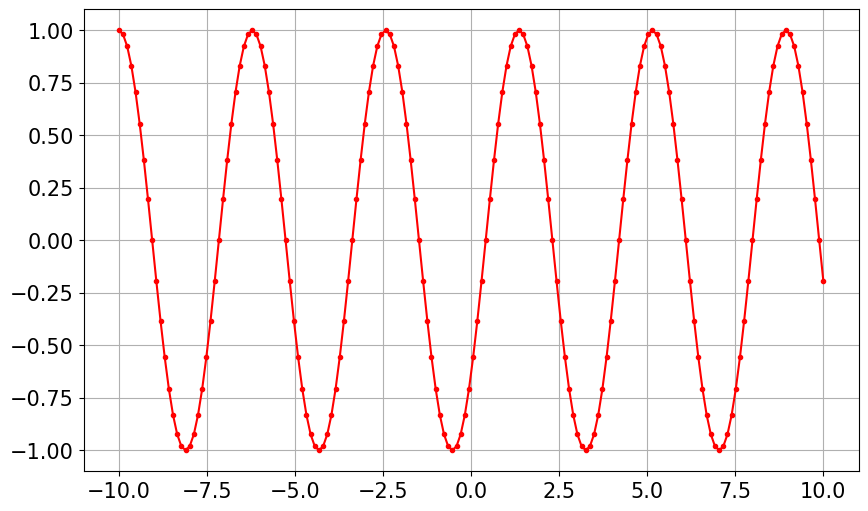

In [6]:
x = np.linspace(-10, 10, 170)
N = 16
xj = np.linspace(-10, 10, 170)
yj = [np.cos((x * np.pi) / N) for x in range(0, 10*(N+1))]

plt.figure(figsize = (10, 6))
plt.plot(xj, yj, ".-r", label="$u(x)$")
plt.grid()
plt.show()


/var/folders/kk/2pj93ygs67nbx9_42r_c6_3c0000gn/T/ipykernel_21783/977726424.py:4: RuntimeWarning: invalid value encountered in sqrt
  yj = [1 / np.sqrt(1 - x**2) for x in xj]


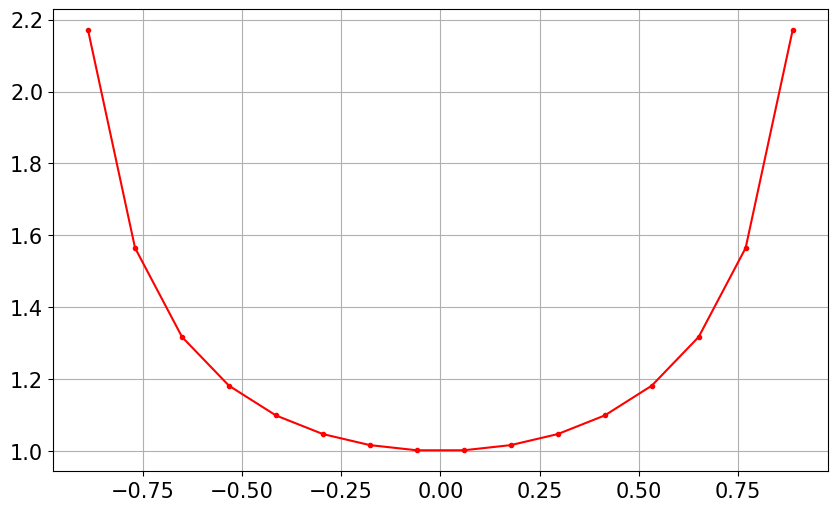

In [7]:
x = np.linspace(-10, 10, 170)
N = 16
xj = np.linspace(-10, 10, 170)
yj = [1 / np.sqrt(1 - x**2) for x in xj]

plt.figure(figsize = (10, 6))
plt.plot(xj, yj, ".-r", label="$u(x)$")
plt.grid()
plt.show()


In [48]:
from scipy.special import eval_legendre

#1.
xj = np.linspace(-1, 1, 100)
xi = [-1 + 1 / np.sqrt(x**2) for x in xj]
print(xi)
yi = [1 / (1 + (16 * x**2)) for x in xi]
print(len(xi) == len(yi))

# 1-degree polynomial (i.e., line) fitting
coefs = poly_fit(xi, yi)
"""

# define the grid points to display the fit polynomial
p = poly_val(coefs, x)

x_exact = xj
y_exact = [1 / (1 + 16 * x ** 2) for x in x_exact]

#figure size
plt.figure(figsize = (10, 10))

#draw 1 figure
plt.subplot(2,1,1)
plt.plot(x_exact, y_exact, "-y", label="$v_{j}(x)$")
plt.plot(x, p, "-b", x, p, ".r", label="$P_{N}(x)$") #, label='$P_{n}(x) dot$')
plt.legend()
plt.grid()


#2.
xj = [np.cos((x * np.pi) / N) for x in range(0, N+1)]
yj = [1 / (1 + (16 * x**2)) for x in xj]

# 1-degree polynomial (i.e., line) fitting
coefs = poly_fit(xj, yj)

# define the grid points to display the fit polynomial
x = np.linspace(-1, 1, 100)
p = poly_val(coefs, x)

#draw 2 figure
plt.subplot(2,1,2)
plt.plot(x_exact, y_exact, "-y", label="$v_{j}(x)$")
plt.plot(x, p, "-b", x, p, ".r" , label="$Q_{N}(x)$")
plt.grid()
plt.legend()

plt.xlabel("$x_{j}$")
plt.ylabel("$v_{j}$")
"""

[0.0, 0.020618556701030855, 0.04210526315789487, 0.06451612903225801, 0.08791208791208782, 0.1123595505617978, 0.13793103448275867, 0.16470588235294126, 0.19277108433734935, 0.22222222222222232, 0.25316455696202533, 0.2857142857142856, 0.32000000000000006, 0.3561643835616439, 0.39436619718309873, 0.4347826086956521, 0.47761194029850773, 0.523076923076923, 0.5714285714285714, 0.6229508196721312, 0.6779661016949154, 0.7368421052631582, 0.7999999999999998, 0.8679245283018873, 0.9411764705882353, 1.0204081632653064, 1.1063829787234045, 1.2000000000000002, 1.3023255813953494, 1.4146341463414633, 1.5384615384615388, 1.6756756756756759, 1.8285714285714292, 2.000000000000001, 2.1935483870967754, 2.413793103448277, 2.666666666666667, 2.9600000000000004, 3.304347826086958, 3.714285714285716, 4.210526315789476, 4.82352941176471, 5.600000000000001, 6.615384615384618, 8.000000000000005, 10.00000000000001, 13.142857142857164, 18.800000000000047, 32.00000000000003, 98.00000000000045, 97.9999999999993

LinAlgError: Singular matrix

In [ ]:
from scipy.special import eval_legendre

N = 16



# 1-degree polynomial (i.e., line) fitting
coefs = poly_fit(xj, yj)

# define the grid points to display the fit polynomial
x = np.linspace(-1, 1, 100)
p = poly_val(coefs, x)

x_exact = np.linspace(-1, 1, 100)
y_exact = [1 / (1 + 16 * x ** 2) for x in x_exact]

plt.figure(figsize = (12,8))
plt.plot(x_exact, y_exact, "-r", label="$u(x)$")
plt.plot(x, p, ".b", lw=1)
plt.grid()
plt.show()

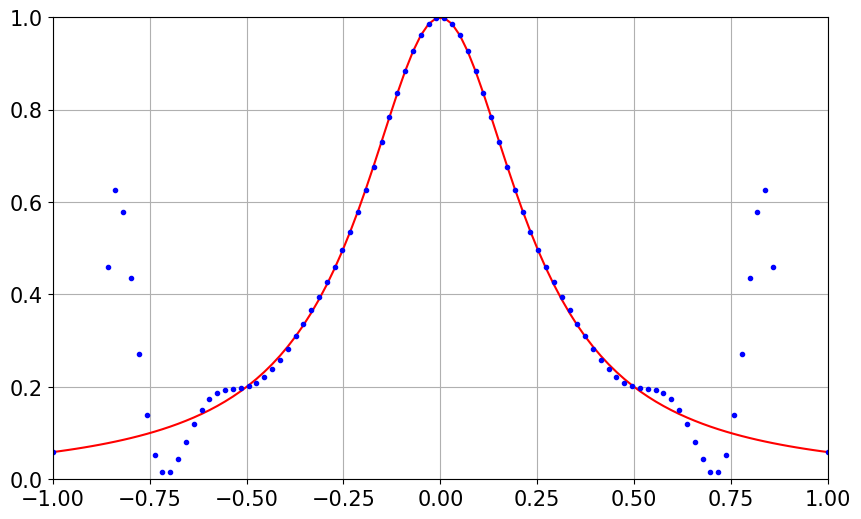

In [43]:
from scipy.special import eval_legendre

N = 16

xi = [-1 + (x/8) for x in range(0, N+1)]

yi = [1 / (1 + (16 * x**2)) for x in xi]

# 1-degree polynomial (i.e., line) fitting
coefs = poly_fit(xi, yi)

# define the grid points to display the fit polynomial
x = np.linspace(-1, 1, 100)
p = poly_val(coefs, x)

x_exact = np.linspace(-1, 1, 100)
y_exact = [1 / (1 + 16 * x ** 2) for x in x_exact]

plt.figure(figsize = (10,6))
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.plot(x_exact, y_exact, "-r", label="$u(x)$")
plt.plot(x, p, ".b", lw=1)
plt.grid()
plt.show()

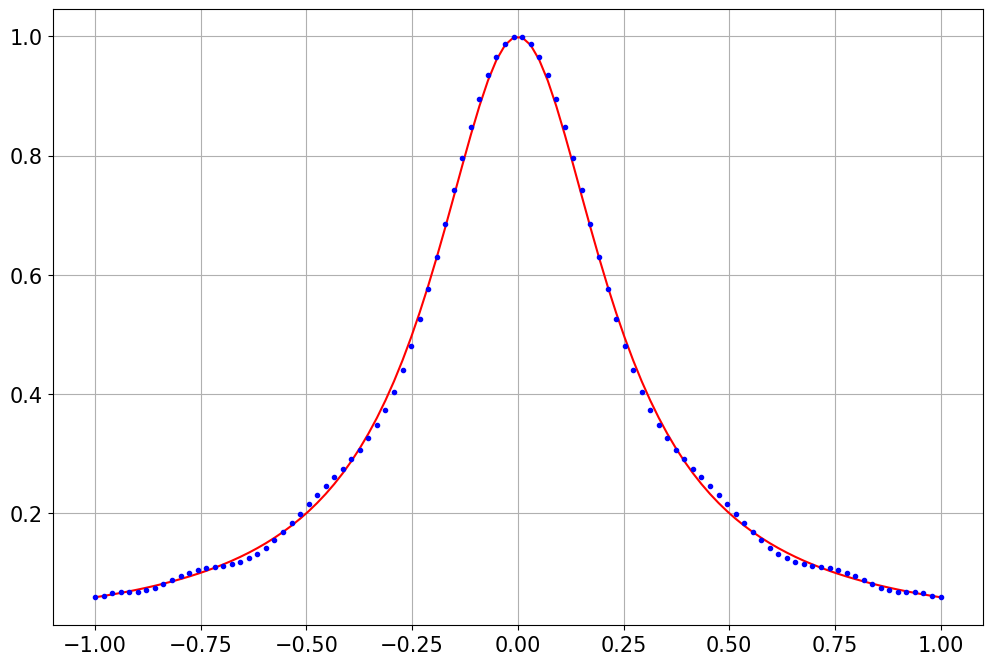

In [148]:
from scipy.special import eval_legendre

N = 16

xj = [np.cos((x * np.pi) / N) for x in range(0, N+1)]
yj = [1 / (1 + (16 * x**2)) for x in xj]

# 1-degree polynomial (i.e., line) fitting
coefs = poly_fit(xj, yj)

# define the grid points to display the fit polynomial
x = np.linspace(-1, 1, 100)
p = poly_val(coefs, x)

x_exact = np.linspace(-1, 1, 100)
y_exact = [1 / (1 + 16 * x ** 2) for x in x_exact]

plt.figure(figsize = (12,8))
plt.plot(x_exact, y_exact, "-r", label="$u(x)$")
plt.plot(x, p, ".b", lw=1)
plt.grid()
plt.show()

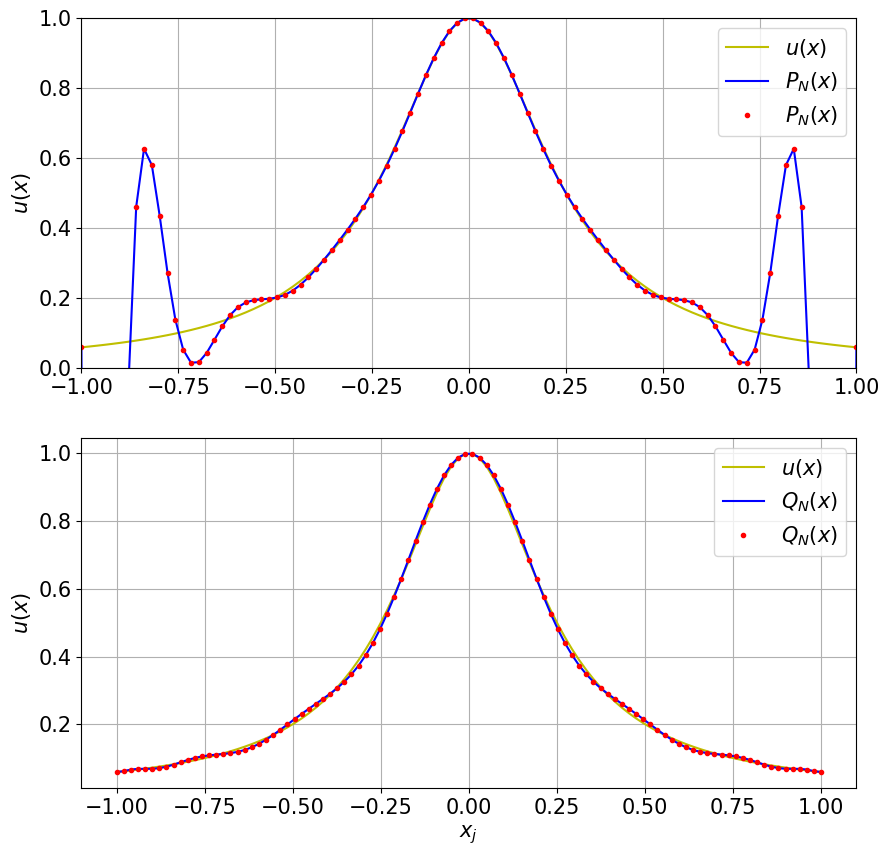

In [28]:
from scipy.special import eval_legendre

N = 16
#1.
xi = [-1 + (x/8) for x in range(0, N+1)]
yi = [1 / (1 + (16 * x**2)) for x in xi]

# 1-degree polynomial (i.e., line) fitting
coefs = poly_fit(xi, yi)


# define the grid points to display the fit polynomial
x = np.linspace(-1, 1, 100)
p = poly_val(coefs, x)

x_exact = x
y_exact = [1 / (1 + 16 * x ** 2) for x in x_exact]

#figure size
plt.figure(figsize = (10, 10))

#draw 1 figure
plt.subplot(2,1,1)
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.plot(x_exact, y_exact, "-y", label="$u(x)$")
plt.plot(x, p, "-b", x, p, ".r", label="$P_{N}(x)$") #, label='$P_{n}(x) dot$')
plt.legend()
plt.grid()
plt.ylabel("$u(x)$")

#2.
xj = [np.cos((x * np.pi) / N) for x in range(0, N+1)]
yj = [1 / (1 + (16 * x**2)) for x in xj]

# 1-degree polynomial (i.e., line) fitting
coefs = poly_fit(xj, yj)

# define the grid points to display the fit polynomial
x = np.linspace(-1, 1, 100)
p = poly_val(coefs, x)

#draw 2 figure
plt.subplot(2,1,2)
plt.plot(x_exact, y_exact, "-y", label="$u(x)$")
plt.plot(x, p, "-b", x, p, ".r" , label="$Q_{N}(x)$")
plt.grid()
plt.legend()

plt.xlabel("$x_{j}$")
plt.ylabel("$u(x)$")
plt.savefig('Runge_Phenomenon.pdf')

Text(0, 0.5, '$v_{j}$')

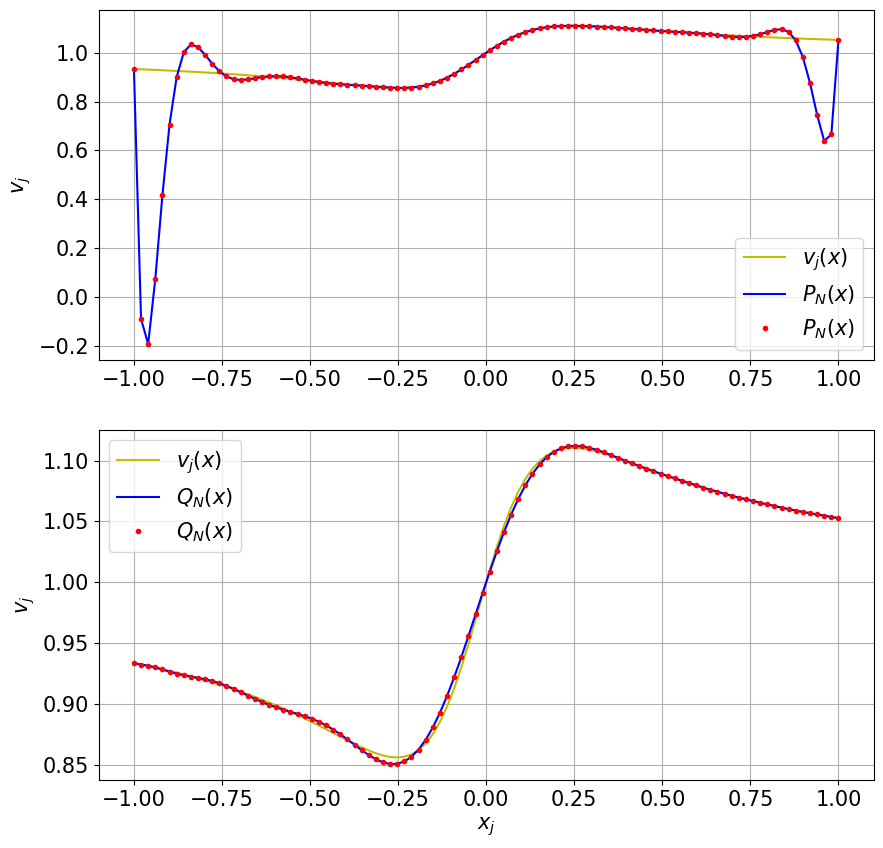

In [51]:
from scipy.special import eval_legendre

N = 16
#1.
xi = [-1 + (x/8) for x in range(0, N+1)]
yi = [1 + x / (1 + (16 * x**2 + x ** 3 + x)) for x in xi]

# 1-degree polynomial (i.e., line) fitting
coefs = poly_fit(xi, yi)


# define the grid points to display the fit polynomial
x = np.linspace(-1, 1, 100)
p = poly_val(coefs, x)

x_exact = x
y_exact = [1 + x / (1 + 16 * x ** 2 + x ** 3+ x) for x in x_exact]

#figure size
plt.figure(figsize = (10, 10))

#draw 1 figure
plt.subplot(2,1,1)

plt.plot(x_exact, y_exact, "-y", label="$v_{j}(x)$")
plt.plot(x, p, "-b", x, p, ".r", label="$P_{N}(x)$") #, label='$P_{n}(x) dot$')
plt.legend()
plt.grid()
plt.ylabel("$v_{j}$")

#2.
xj = [np.cos((x * np.pi) / N) for x in range(0, N+1)]
yj = [1 + x / (1 + (16 * x**2 + x ** 3+ x)) for x in xj]

# 1-degree polynomial (i.e., line) fitting
coefs = poly_fit(xj, yj)

# define the grid points to display the fit polynomial
x = np.linspace(-1, 1, 100)
p = poly_val(coefs, x)

#draw 2 figure
plt.subplot(2,1,2)
plt.plot(x_exact, y_exact, "-y", label="$v_{j}(x)$")
plt.plot(x, p, "-b", x, p, ".r" , label="$Q_{N}(x)$")
plt.grid()
plt.legend()

plt.xlabel("$x_{j}$")
plt.ylabel("$v_{j}$")


In [52]:
def least_squares(X, y):
    """Returns the least-squares solution of the equation
    
        (X^T X)β = X^T y
        
    :param X:
        A matrix of size N x M.
    :param y:
        A column vector of length N.
    """
    XT = np.transpose(X)
    return la.solve(XT @ X, XT @ y)


beta_1 = 0.0, beta_2 = 0.0



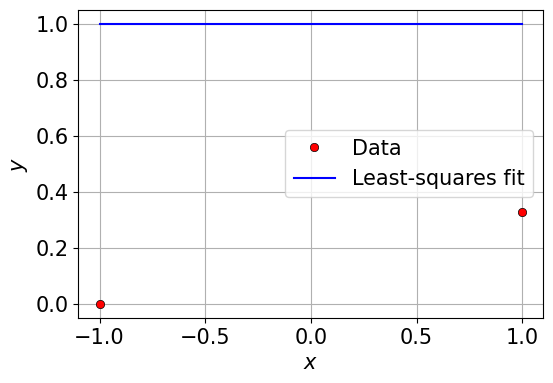

In [71]:
# data points
xi, yi = map(np.array, zip(*[
    [-1, 0],
    [1, 0.3288]
]))

# find least-squares solution
X = np.vstack([
    np.exp(4*xi),
    xi,
    xi**0,
]).T
Y = np.ones(len(X))

# find least-squares solution
b1, b2, b3 = least_squares(X, Y)
print(f"""
beta_1 = {b1}, beta_2 = {b2}
""")

# draw
plt.figure(figsize=[6, 4])
ax = plt.subplot()

plt.plot(xi, yi, "or", markeredgewidth=0.5, markeredgecolor="k",
         label="Data")

xs = np.linspace(-1, 1, 100)
ys = np.exp(4*xs) * b1 + xs * b2 + xs**0 * b3
plt.plot(xs, ys, "-b", label="Least-squares fit")
plt.grid()
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()